# 用scikit-learn和pandas学习线性回归

对于想深入了解线性回归的童鞋，这里给出一个完整的例子，详细学完这个例子，对用scikit-learn来运行线性回归，评估模型不会有什么问题了。

## 1. 获取数据，定义问题

没有数据，当然没法研究机器学习啦。:) 这里我们用UCI大学公开的机器学习数据来跑线性回归。

数据的介绍在这：

http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

数据的下载地址在这：

http://archive.ics.uci.edu/ml/machine-learning-databases/00294/

里面是一个循环发电场的数据，共有9568个样本数据，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)。我们不用纠结于每项具体的意思。

我们的问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即:

$$PE=θ_0+θ_1∗AT+θ_2∗V+θ_3∗AP+θ_4∗RH$$

而需要学习的，就是$$θ_0,θ_1,θ_2,θ_3,θ_4$$这5个参数。

## 2. 整理数据

下载后的数据可以发现是一个压缩文件，解压后可以看到里面有一个xlsx文件，我们先用excel把它打开，接着“另存为“”csv格式，保存下来，后面我们就用这个csv来运行线性回归。

打开这个csv可以发现数据已经整理好，没有非法数据，因此不需要做预处理。但是这些数据并没有归一化，也就是转化为均值0，方差1的格式。也不用我们搞，后面scikit-learn在线性回归时会先帮我们把归一化搞定。

好了，有了这个csv格式的数据，我们就可以大干一场了。


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

接着我们就可以用pandas读取数据了

In [3]:
# read_csv里面的参数是csv在你电脑上的路径，此处csv文件放在notebook运行目录下面的CCPP目录里
data = pd.read_excel('./dataset/ccpp.xlsx')

测试下读取数据是否成功：

In [4]:
#读取前五行数据，如果是最后五行，用data.tail()
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


看到上面的数据，说明pandas读取数据成功。


## 4. 准备运行算法的数据

我们看看数据的维度：


In [5]:
data.shape

(9568, 5)

结果是(9568, 5)。说明我们有9568个样本，每个样本有5列。

现在我们开始准备样本特征X，我们用AT， V，AP和RH这4个列作为样本特征。

In [6]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


接着我们准备样本输出y， 我们用PE作为样本输出。

In [7]:
y = data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


## 5. 划分训练集和测试集

我们把X和y的样本组合划分成两部分，一部分是训练集，一部分是测试集，代码如下：

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

查看下训练集和测试集的维度：

In [9]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


可以看到75%的样本数据被作为训练集，25%的样本被作为测试集。

## 6. 运行scikit-learn的线性模型

终于到了临门一脚了，我们可以用scikit-learn的线性模型来拟合我们的问题了。scikit-learn的线性回归算法使用的是最小二乘法来实现的。代码如下:

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

拟合完毕后，我们看看我们的需要的模型系数结果：

In [11]:
print (linreg.intercept_)
print (linreg.coef_)

[460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


这样我们就得到了在步骤1里面需要求得的5个值。也就是说PE和其他4个变量的关系如下：


$$PE=447.06297099−1.97376045∗AT−0.23229086∗V+0.0693515∗AP−0.15806957∗RH$$

## 7. 模型评价

我们需要评估我们的模型的好坏程度，对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

我们看看我们的模型的MSE和RMSE，代码如下：

In [12]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.837191547220353
RMSE: 4.564777272465805


得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。

比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：

In [13]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.905653799527798
RMSE: 4.889340834870054


可以看出，去掉RH后，模型拟合的没有加上RH的好，MSE变大了

## 8. 交叉验证

我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10：

In [14]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.793672509857537
RMSE: 4.560007950635343


可以看出，采用交叉验证模型的MSE比第6节的大，主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，而第6节仅仅对25%的测试集做了MSE。两者的先决条件并不同。

## 9. 画图观察结果

这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低。代码如下：



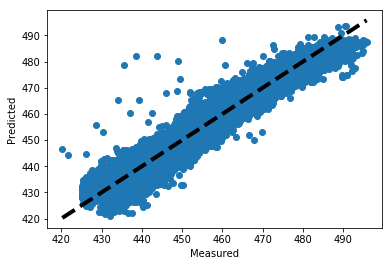

In [15]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()